# Business Analytics & Data Mining: Final Project

**Shelby Armbrister:** "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

## Modeling, Evaluation, & Deployment Using IMDb Scores

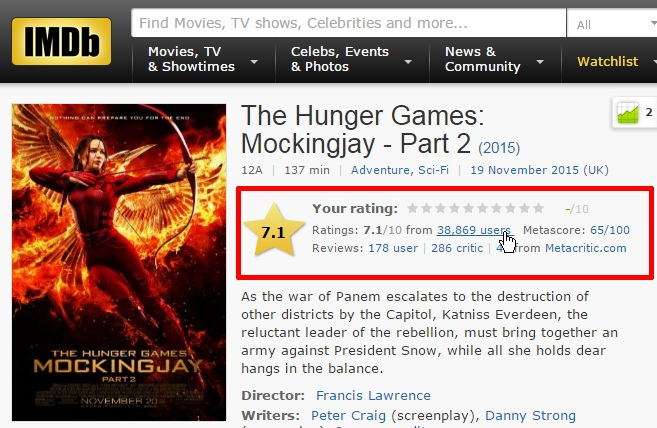

In [102]:
from IPython.display import Image
Image('imdb_pic.jpg')

### Introduction 
- This project will be using a variety of machine learning models to analyze the IMDb movie dataset.
- The dataset contains IMDb rated movie information for over 5,000 movies
- This analysis will be evaluating different machine learning models. (maybe elaborate later) 

In [188]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV

from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import cdist 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn import cluster
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances



In [186]:
conda install -c conda-forge rise

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\19724\Anaconda3

  added / updated specs:
    - rise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    ca-certificates-2019.11.28 |       hecc5488_0         182 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.7.12               |           py37_1         3.0 MB  conda-forge
    openssl-1.1.1d             |       hfa6e2cd_0         4.7 MB  conda-forge
    rise-5.6.0                 |        

Error processing line 7 of C:\Users\19724\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\19724\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
Error processing line 7 of C:\Users\19724\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\19724\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [104]:
#load the data 
df = pd.read_csv('movie_metadataCLEAN.csv')
df.head(5)

,Unnamed: 0,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,ROI
0,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
4,5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


In [105]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,ROI
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


### Quickly looking over the types of columns we have in our dataset:

In [106]:
#displaying available columns and info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 28 columns):
director_name                3806 non-null object
num_critic_for_reviews       3805 non-null float64
duration                     3806 non-null float64
director_facebook_likes      3806 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_2_name                 3804 non-null object
actor_1_facebook_likes       3805 non-null float64
gross                        3806 non-null float64
genres                       3806 non-null object
actor_1_name                 3805 non-null object
movie_title                  3806 non-null object
num_voted_users              3806 non-null int64
cast_total_facebook_likes    3806 non-null int64
actor_3_name                 3800 non-null object
facenumber_in_poster         3800 non-null float64
plot_keywords                3785 non-null object
movie_imdb_link              3806 non-null object
num_user_for_reviews         3806 non-

In [107]:
df = df.dropna()
df.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
profit                       0
ROI                          0
dtype: int64

### Deciding Which Important Features to Select

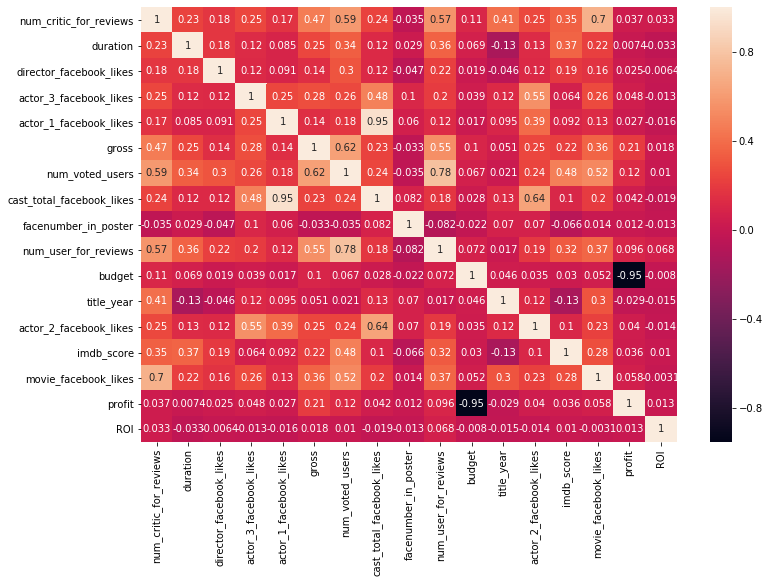

In [108]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

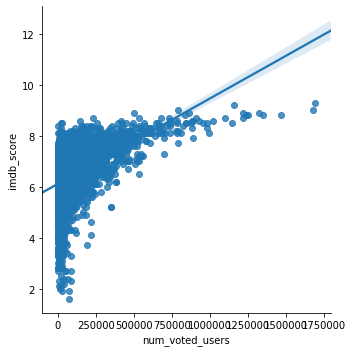

In [109]:
#Comparing Number of Users Who Voted Against IMDb Score  
sns.lmplot('num_voted_users', 'imdb_score', df)

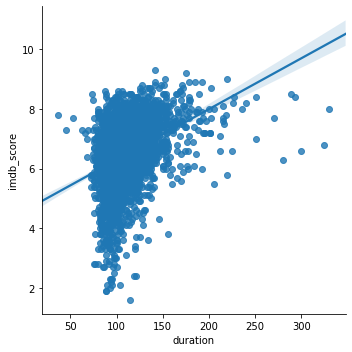

In [110]:
#Comparing Duration and IMDb Score
sns.lmplot('duration', 'imdb_score', df);

### Regression
- Using different regression algorithms with IMDb score as the Y value
- Making sure to use important features in our models 
- Goal is to deploy the model to try to predict the future

In [111]:
#steps, model 1 could be full model with all x varibales, problems with multicollin
#model 2 could use only 2 predictors (ones with high corr)
#model 3 stats model (uses all varibales)? not practical to use all
#model 3 use stats model sm.ols but don't do full model
# so maybe figure out important features first before doing anything else?
# could do this by running a couple different stats models with different numbers of preditors
# get more simplified as you go?
# see multicoll sec of lab 2 to show all model side by side performance

#model deployment (use your 2 favorite columns to predict, use sklearn)

### Model Development (Model w/ fewer predictors)
- want low SSE & fewer predictors
- **Regularization**: Lasso & Ridge
- **Feature Selection**: selecting most useful predictors only (select K Best)


### Lasso & Ridge

### Model 1: Lasso
- method used to reduce model complexity and prevent over-fitting as well as asist in feature selection

When assigning our X variables, all of the objects must be excluded in order for the model to work.  

In [112]:
#assigning columns for X & Y variables
y = df['imdb_score']
X = df.drop(['imdb_score', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'], axis=1)

In [113]:
#Lasso 
model1 = lm.Lasso()             #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1450.302636886456, tolerance: 0.41883828692654473
  positive)


In [114]:
model1

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.72667105e-03  8.85890635e-03  7.84002531e-06  6.45619648e-05
  7.03151393e-05 -1.81714794e-09  3.89077226e-06 -6.96246834e-05
 -0.00000000e+00 -5.19874707e-04 -2.16316293e-11 -8.14074766e-03
  7.25729098e-05 -1.59120128e-06  1.36679106e-11  1.37975410e-06]
y-intercept  21.43783996242719


In [116]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.009'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.008'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000'),
 ('ROI', '0.000')]

The lasso technique doesn't appear to have narrowed it down quite enough to simplify the model to my liking so we will move on to the next technique for model development. 

In [117]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7311803144876116
variance or r-squared:  0.34168363972504945


### Model 2: Ridge 
- shrinks the coefficients and helps reduce model complexity and multi-collinearity

In [118]:
model2 = lm.Ridge()             #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model2.predict(X)

C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.70809e-17): result may not be accurate.
  overwrite_a=True).T


In [119]:
model2 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [120]:
#comparing actual y and predicted y from model 2
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7124302698159475
variance or r-squared:  0.358565195366892


Here you can see that the Ridge method has a slightly higher R squared but still nowhere near where we want it to be. 

### Model 3: Feature Selection
- this method scores the features to select the variables that contribute most to the target variable 

In [121]:
#select only 3 X variables (most important)  
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[7.23000e+02, 1.78000e+02, 8.86204e+05],
       [3.02000e+02, 1.69000e+02, 4.71220e+05],
       [6.02000e+02, 1.48000e+02, 2.75868e+05],
       ...,
       [5.60000e+01, 8.10000e+01, 5.20550e+04],
       [1.40000e+01, 9.50000e+01, 1.33800e+03],
       [4.30000e+01, 9.00000e+01, 4.28500e+03]])

In [122]:
# this helps us find out which variables are selected (tells you the index where they are so you can figure out column names)

selector = SelectKBest(f_regression, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 1 6]


In [123]:
# to find out our top 3 columns selected 
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit,ROI
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0,220.888543
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,9404152.0,3.134717


#### According to the select K Best method, our top 3 features are: 
- Number of Critics for reviews
- Duration
- Number of Users that Voted

This lines up really well with the analysis performed in part 1 of this project as well as the correlation heat map conducted earlier. 

In [124]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7982910641430045
variance or r-squared:  0.28126064477691337


Somehow, our R-squared is even worse with this method which seems to be counterintuitive as we eliminated a lot of the 'noise' by narrowing it down to our 3 best predictors. 

### Model 4: Random Forest Regressor
- ensemble machine learning technique uses multiple decision trees and a statistically technique called bagging

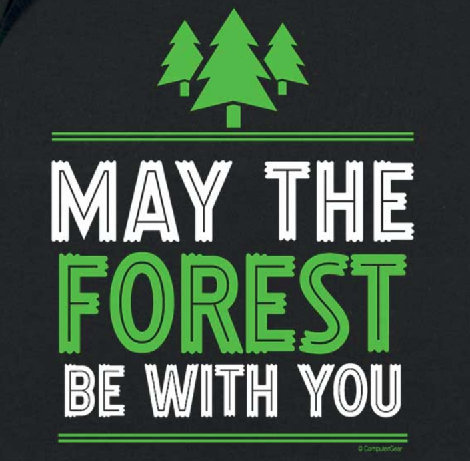

In [201]:
from IPython.display import Image
Image('forestpic.png')

In [125]:
#import the packages and then change the name 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [126]:
regr = RandomForestRegressor()
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

C:\Users\19724\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean square error:  0.09453110580747813
variance or r-squared:  0.9149048819214425


Now that's a much better looking model! The R squared is **3 times better** than our previous 3 models at .909. 

In [127]:
# this provides a ranking that adds up to 1
sorted(zip(regr.feature_importances_, X.columns))

[(0.015921862723499762, 'facenumber_in_poster'),
 (0.020885192570597327, 'actor_1_facebook_likes'),
 (0.021823734286415875, 'cast_total_facebook_likes'),
 (0.027817039159728347, 'ROI'),
 (0.028454565936004796, 'profit'),
 (0.028955337042533183, 'actor_2_facebook_likes'),
 (0.03166915293856861, 'movie_facebook_likes'),
 (0.034717926777308644, 'director_facebook_likes'),
 (0.03881689774172375, 'title_year'),
 (0.041595081010827595, 'actor_3_facebook_likes'),
 (0.0455139061109229, 'num_critic_for_reviews'),
 (0.056167624630651405, 'gross'),
 (0.06629115176179093, 'num_user_for_reviews'),
 (0.10437575046378388, 'budget'),
 (0.1140673741434558, 'duration'),
 (0.32292740270218734, 'num_voted_users')]

In [128]:
# this provides a ranking that adds up to 1

feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
num_voted_users,0.322927
duration,0.114067
budget,0.104376
num_user_for_reviews,0.066291
gross,0.056168
num_critic_for_reviews,0.045514
actor_3_facebook_likes,0.041595
title_year,0.038817
director_facebook_likes,0.034718
movie_facebook_likes,0.031669


#### Visualizing Top 5 Features

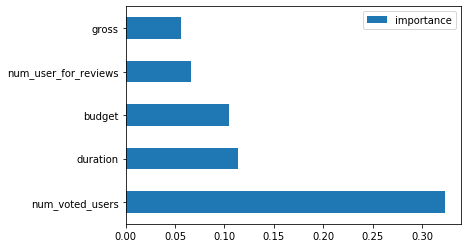

In [129]:
#Visualizing Top 5 Features
feature_importances.head().plot(kind='barh');

- Our best model by FAR is the Random Forest Regressor, so lets move on to model validation

### Model Validation using our best model, Random Forest

In [130]:
# Test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [131]:
print(len(df), len(X), len(y))

3771 3771 3771


In [132]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

2639 2639 1132 1132


In [133]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
regr_predicted = regr.predict(X_test)

C:\Users\19724\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
print("mean square error: ", mean_squared_error(y_test, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, regr_predicted))

mean square error:  0.5707862190812721
variance or r-squared:  0.5059985857313127


In [135]:
#Predicted Values w/ our model
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit,ROI
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0,220.888543
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,9404152.0,3.134717


Our model will predict the IMDb scores at about 50% accuracy.  

### Classification
- Building classification model to predict if a movie is good or bad
- Evaluating different classification algorithms


- first need to create categorical column with score buckets

### Creating Bins 

- In order to build classification models, we must first create a new categorical column from the IMDb scores by "binning" the scores into 4 categories/buckets (0,1,2,3): 
    - < 4: **Bad = 0**
    - 4-6: **OK = 1**
    - 6-8: **Good = 2**
    - 8-10:**Excellent = 3**

In [136]:
#Creating Bins for the IMDb Scores & Getting Rid of Objects
df1 = df.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'], axis=1)
df1['imdbscore_category'] = pd.cut(df1['imdb_score'], bins=[0, 4, 6, 8, 10], labels=[0,1,2,3])

In [137]:
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,ROI,imdbscore_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071,2
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257,3
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775,2


### Model Building
1. Decision Tree
2. Knn
3. Logistic Regression
4. Random Forest Classifier

### Important Features
We've already selected our features from the "Feature Selection" performed previously above. 

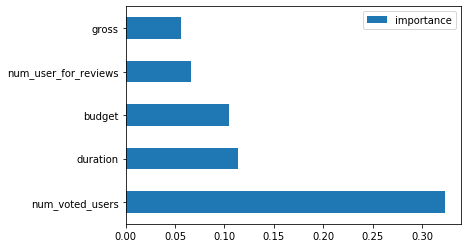

In [138]:
feature_importances.head().plot(kind='barh');

In [139]:
# declare X and y variables
y = df1['imdbscore_category']
X = df1.drop(['imdbscore_category', 'imdb_score'], axis=1)

print(y.shape, X.shape)

(3771,) (3771, 16)


### Decision Tree

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize DecisionTreeClassifier
# saying what algorithm you want to use
dt = DecisionTreeClassifier()

# Train a decision tree model

dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [141]:
#Model evaluation (see if actual y and predicted y match)
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.6749116607773852
--------------------------------------------------------
[[  2  15  11   0]
 [ 12 179 127   0]
 [ 12 156 549  14]
 [  1   1  19  34]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.07      0.07      0.07        28
           1       0.51      0.56      0.54       318
           2       0.78      0.75      0.76       731
           3       0.71      0.62      0.66        55

    accuracy                           0.67      1132
   macro avg       0.52      0.50      0.51      1132
weighted avg       0.68      0.67      0.68      1132

--------------------------------------------------------


In [142]:
print(len(y_test))

1132


Note that the R squared is .675 or 67.5% which is not too bad!

In [96]:
!pip install scikit-plot
import scikitplot as skplt

Error processing line 7 of C:\Users\19724\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\19724\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
C:\Users\19724\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Confusion Matrix

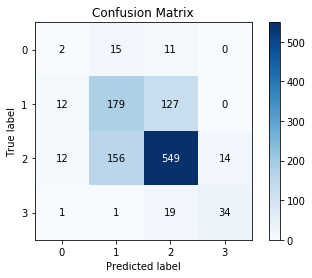

In [143]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

### Interpreting the Matrix
- **Overall Accuracy**: .67 or 67%
- Along the diagonal are ones correctly predicted 
- top right corner: bad movies misclassified as excellent (o)
- bottom left corner: excellent movie misclassified as bad (1)
- OK job predicting the "OK" movies (179/318) 56%
- did well predicted "Good" movies (549/731) about 75% accuracy


### Visualizing the Full Decision Tree 

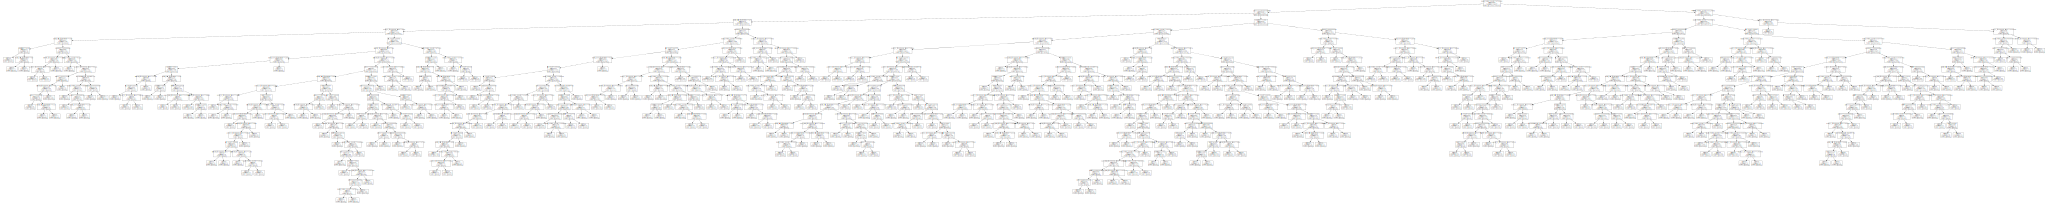

In [144]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

### Developing Logistic Regression Model

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6581272084805654
[[  0   0  26   0]
 [  0   0 329   0]
 [  0   0 730   0]
 [  0   0  32  15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00       329
           2       0.65      1.00      0.79       730
           3       1.00      0.32      0.48        47

    accuracy                           0.66      1132
   macro avg       0.41      0.33      0.32      1132
weighted avg       0.46      0.66      0.53      1132



C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\19724\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model is okay, but so far the decision tree is slightly better. 

### Recursive Feature Selection (RFE)

In [146]:
model = LogisticRegression()
rfe = RFE(model, 5)  #asking five best attributes (when building log reg model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[ True  True False False False False False False  True  True False  True
 False False False False]
[ 1  1  7  4  5 10  9  6  1  1 11  1  3  8 12  2]


C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [147]:
X.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit,ROI
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0,220.888543


### Features sorted by their rank (the ones with 1's are the important ones)

In [148]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,num_critic_for_reviews,1
1,duration,1
2,director_facebook_likes,7
3,actor_3_facebook_likes,4
4,actor_1_facebook_likes,5
5,gross,10
6,num_voted_users,9
7,cast_total_facebook_likes,6
8,facenumber_in_poster,1
9,num_user_for_reviews,1


### Important features using RFE: 
- Num Critics
- Duration
- Num Faces in Poster (odd)
- Num User Reviews

Lets dump those into the model and see how it turns out!

In [149]:
X_logistic = df1[['num_critic_for_reviews', 'duration', 'facenumber_in_poster', 'num_user_for_reviews']]
print(X_logistic.head())

   num_critic_for_reviews  duration  facenumber_in_poster  \
0                   723.0     178.0                   0.0   
1                   302.0     169.0                   0.0   
2                   602.0     148.0                   1.0   
3                   813.0     164.0                   0.0   
4                   462.0     132.0                   1.0   

   num_user_for_reviews  
0                3054.0  
1                1238.0  
2                 994.0  
3                2701.0  
4                 738.0  


### Building Log Reg Model with the new variables

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6475265017667845
[[  0   4  22   0]
 [  0  31 298   0]
 [  0  24 700   6]
 [  0   1  44   2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.52      0.09      0.16       329
           2       0.66      0.96      0.78       730
           3       0.25      0.04      0.07        47

    accuracy                           0.65      1132
   macro avg       0.36      0.27      0.25      1132
weighted avg       0.58      0.65      0.55      1132



C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19724\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\19724\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Still we have decent model accuracy at .6475 but our decision tree model is still our best bet sitting at .675.

### Feature Importance: Extra Tree Classifier

In [152]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))

1.0
[0.07708319 0.07746996 0.05189294 0.0515851  0.04449356 0.07359683
 0.12675619 0.04847961 0.04160146 0.07004608 0.06558817 0.06651563
 0.04419456 0.05628405 0.05615393 0.04825876]


C:\Users\19724\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [153]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0416, 'facenumber_in_poster'), (0.0442, 'actor_2_facebook_likes'), (0.0445, 'actor_1_facebook_likes'), (0.0483, 'ROI'), (0.0485, 'cast_total_facebook_likes'), (0.0516, 'actor_3_facebook_likes'), (0.0519, 'director_facebook_likes'), (0.0562, 'profit'), (0.0563, 'movie_facebook_likes'), (0.0656, 'budget'), (0.0665, 'title_year'), (0.07, 'num_user_for_reviews'), (0.0736, 'gross'), (0.0771, 'num_critic_for_reviews'), (0.0775, 'duration'), (0.1268, 'num_voted_users')]


In [154]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
num_voted_users,0.126756
duration,0.077470
num_critic_for_reviews,0.077083
gross,0.073597
num_user_for_reviews,0.070046
title_year,0.066516
budget,0.065588
movie_facebook_likes,0.056284
profit,0.056154
director_facebook_likes,0.051893


So now we are seeing a shift in the features that take the most importance. If you recall the # 1 feature used to be the number of critics, now its the number of users the voted. 

### Advanced Algorithms

In [155]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### Gradient Boosting Classfier

In [156]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))

0.6439929328621908
--------------------------------------------------------
[[  0  10  15   1]
 [  9 104 215   1]
 [  2 101 619   8]
 [  0   1  40   6]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.48      0.32      0.38       329
           2       0.70      0.85      0.76       730
           3       0.38      0.13      0.19        47

    accuracy                           0.64      1132
   macro avg       0.39      0.32      0.33      1132
weighted avg       0.60      0.64      0.61      1132



This classifier is still not as accurate as the decision tree sitting at .64 vs .67. 

In [157]:
scores = cross_val_score(gb, X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.72295515 0.75197889 0.75461741 0.74603175 0.8015873  0.75797872
 0.71542553 0.72074468 0.66666667 0.58666667]
0.722465276830993


Again, these scores aren't too bad but could definitely be better. 

### Support Vector Machine (SVM)

In [158]:
svm = SVC(gamma='scale', probability=True)
svm.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svm.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svm.predict(X_test)))

0.6431095406360424
--------------------------------------------------------
[[  0   0  26   0]
 [  0   0 329   0]
 [  0   0 728   2]
 [  0   0  47   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00       329
           2       0.64      1.00      0.78       730
           3       0.00      0.00      0.00        47

    accuracy                           0.64      1132
   macro avg       0.16      0.25      0.20      1132
weighted avg       0.42      0.64      0.50      1132



C:\Users\19724\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Not a bad model either, but still not the best one sitting at 64% accuracy. 

### Neural Network

In [160]:
nn = MLPClassifier(solver='lbfgs', max_iter=500)
nn.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, nn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, nn.predict(X_test)))

0.6448763250883393
--------------------------------------------------------
[[  0   0  26   0]
 [  0   0 329   0]
 [  0   0 730   0]
 [  0   0  47   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00       329
           2       0.64      1.00      0.78       730
           3       0.00      0.00      0.00        47

    accuracy                           0.64      1132
   macro avg       0.16      0.25      0.20      1132
weighted avg       0.42      0.64      0.51      1132



C:\Users\19724\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Almost same accuracy as the previous model here as well. 

### Classification Conclusions
- The decision tree model had the highest accuracy out of all of models demonstrated at 67%, outdoing the majority of our models by around 3%. So depending on preference, you could really use any of the models and get fairly similar results. 


## Clustering
- Analyzing the data using K-Means and Hierarchical clustering algorithms
- Determining optimal K value for K-means
- Creating movie profiles

### Perform Variance Analysis

In [169]:
df1.var()

num_critic_for_reviews       1.523631e+04
duration                     5.120848e+02
director_facebook_likes      9.352692e+06
actor_3_facebook_likes       3.452060e+06
actor_1_facebook_likes       2.409119e+08
gross                        4.841465e+15
num_voted_users              2.280782e+10
cast_total_facebook_likes    3.630599e+08
facenumber_in_poster         4.171896e+00
num_user_for_reviews         1.679688e+05
budget                       5.087316e+16
title_year                   9.775357e+01
actor_2_facebook_likes       2.034255e+07
imdb_score                   1.110977e+00
movie_facebook_likes         4.542307e+08
profit                       5.258865e+16
ROI                          1.732947e+08
imdbscore_category           3.392100e-01
dtype: float64

### Normalize data

In [174]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3805
Data columns (total 18 columns):
num_critic_for_reviews       3771 non-null float64
duration                     3771 non-null float64
director_facebook_likes      3771 non-null float64
actor_3_facebook_likes       3771 non-null float64
actor_1_facebook_likes       3771 non-null float64
gross                        3771 non-null float64
num_voted_users              3771 non-null int64
cast_total_facebook_likes    3771 non-null int64
facenumber_in_poster         3771 non-null float64
num_user_for_reviews         3771 non-null float64
budget                       3771 non-null float64
title_year                   3771 non-null float64
actor_2_facebook_likes       3771 non-null float64
imdb_score                   3771 non-null float64
movie_facebook_likes         3771 non-null int64
profit                       3771 non-null float64
ROI                          3771 non-null float64
imdbscore_category           377

In [176]:
# Resetting DF to have imdb score instead of our category bucket created earlier
df1 = df.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'], axis=1)

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3805
Data columns (total 17 columns):
num_critic_for_reviews       3771 non-null float64
duration                     3771 non-null float64
director_facebook_likes      3771 non-null float64
actor_3_facebook_likes       3771 non-null float64
actor_1_facebook_likes       3771 non-null float64
gross                        3771 non-null float64
num_voted_users              3771 non-null int64
cast_total_facebook_likes    3771 non-null int64
facenumber_in_poster         3771 non-null float64
num_user_for_reviews         3771 non-null float64
budget                       3771 non-null float64
title_year                   3771 non-null float64
actor_2_facebook_likes       3771 non-null float64
imdb_score                   3771 non-null float64
movie_facebook_likes         3771 non-null int64
profit                       3771 non-null float64
ROI                          3771 non-null float64
dtypes: float64(14), int64(3)
me

In [202]:
#Normalizing the data
dfnorm = (df1 - df1.mean()) / (df1.max() - df1.min())
dfnorm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,ROI
0,0.687499,0.231837,-0.034783,0.004184,-0.010463,0.931810,0.462761,-0.010028,-0.031982,0.538140,0.015659,0.067383,-0.007716,0.186667,0.068204,0.040619,-0.000437
1,0.168387,0.201120,-0.010305,0.010489,0.050474,0.338650,0.217167,0.056233,-0.031982,0.179104,0.020817,0.044911,0.021948,0.082771,-0.026352,0.000256,-0.000740
2,0.538301,0.129448,-0.034783,-0.025990,0.005162,0.194890,0.101554,0.000427,-0.008726,0.130864,0.016314,0.134799,-0.011680,0.043810,0.217202,-0.004010,-0.000769
3,0.798473,0.184055,0.921738,0.967010,0.030162,0.521063,0.615528,0.145173,-0.031982,0.468349,0.016723,0.101091,0.153335,0.264589,0.443563,0.015073,-0.000634
4,0.365674,0.074840,-0.014131,-0.009946,-0.011026,0.027875,0.063877,-0.014537,-0.008726,0.080251,0.017845,0.101091,-0.009935,0.017836,0.042416,-0.015450,-0.000844


In [203]:
dfnorm.var()

num_critic_for_reviews       0.023165
duration                     0.005965
director_facebook_likes      0.017680
actor_3_facebook_likes       0.006526
actor_1_facebook_likes       0.000588
gross                        0.008371
num_voted_users              0.007988
cast_total_facebook_likes    0.000842
facenumber_in_poster         0.002256
num_user_for_reviews         0.006566
budget                       0.000341
title_year                   0.012341
actor_2_facebook_likes       0.001084
imdb_score                   0.018738
movie_facebook_likes         0.003729
profit                       0.000324
ROI                          0.000335
dtype: float64

### Determining K Value
- Elbow Method

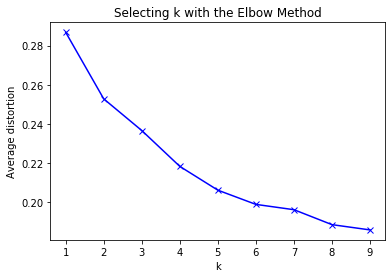

In [189]:
K = list(range(1, 10)) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

So it actually looks like the optimal amount of clusters is more along the lines of 4 or 5 clusters. Lets do 4 so we can develop some profiles for each cluster. 

### KMeans Clusters
- Doing 4 clusters to depict from the good movies and the bad movies based on the elbow method

In [204]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [205]:
k_means.fit(dfnorm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [206]:
k_means.labels_

array([2, 2, 2, ..., 3, 1, 3])

In [207]:
k_means.cluster_centers_

array([[ 1.01688443e-01,  5.38776808e-02,  6.06923462e-01,
         3.59797693e-02,  9.50208920e-03,  5.31454991e-02,
         1.05142150e-01,  1.43297104e-02, -9.15698959e-03,
         6.92100483e-02,  6.61336924e-04, -3.09663305e-02,
         1.49249053e-02,  1.08264139e-01,  3.55116846e-02,
         2.53901152e-03, -4.83878735e-04],
       [-7.40650661e-02, -3.76732344e-02, -2.99248732e-02,
        -8.09833051e-03, -2.96159586e-03, -2.73739102e-02,
        -4.18844137e-02, -4.21598832e-03,  4.52186273e-03,
        -3.08285647e-02, -1.03636376e-03,  1.51818131e-02,
        -4.84539341e-03, -1.48770296e-01, -1.93512769e-02,
        -6.40530599e-04, -6.43511572e-04],
       [ 2.29241721e-01,  3.55807796e-02, -2.28809977e-02,
         3.51390582e-02,  7.50442660e-03,  8.71916354e-02,
         1.01088850e-01,  1.21589541e-02, -1.41144127e-03,
         8.39086800e-02,  3.74500943e-03,  6.34153626e-02,
         1.41325664e-02,  8.91682775e-02,  6.90546153e-02,
         1.61442163e-03,  1.5

In [208]:
df2 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2.head()

,cluster
0,2
1,2
2,2
3,0
4,2


In [209]:
df3 = df.join(df2)
df3.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,ROI,cluster
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543,2.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717,2.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071,2.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257,0.0
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775,2.0


In [210]:
df3.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,ROI
cluster,,,,,,,,,,,,,,,,,
0.0,205.882716,113.839506,1808.907407,1435.530864,8176.728395,7.700941e+07,168469.796296,14268.611111,1.092593,452.777778,5.190738e+07,2005.030864,3119.012346,6.597531,16272.950617,2.510203e+07,70.927013
1.0,152.306612,109.133884,595.003306,652.549587,7261.756198,4.075838e+07,86739.019835,10528.374380,1.395868,291.916529,3.481702e+07,2002.781818,1729.398347,6.378512,7833.546281,5.941355e+06,543.579977
2.0,212.437126,114.752994,951.741018,1098.889222,8818.574850,9.498926e+07,157116.745509,14030.191617,1.354790,485.742515,7.036850e+07,2004.541916,2820.723054,6.579491,13623.164671,2.462077e+07,140.557481
3.0,153.724382,108.883981,802.234982,648.587750,7640.738516,4.131178e+07,91270.502945,10940.429918,1.405771,291.840989,4.405121e+07,2002.394582,1782.021201,6.458186,7877.671378,-2.739425e+06,606.670181


In [211]:
### Number of Observations in Each Cluster
df3.groupby('cluster').size()

cluster
0.0     162
1.0    1210
2.0     668
3.0    1698
dtype: int64

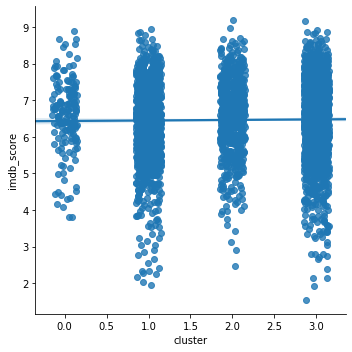

In [212]:
#Displaying the newly made clusters
sns.lmplot("cluster", "imdb_score", df3, x_jitter=.15, y_jitter=.15)

### Agglomerative Clustering w/ 4 Clusters

In [213]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

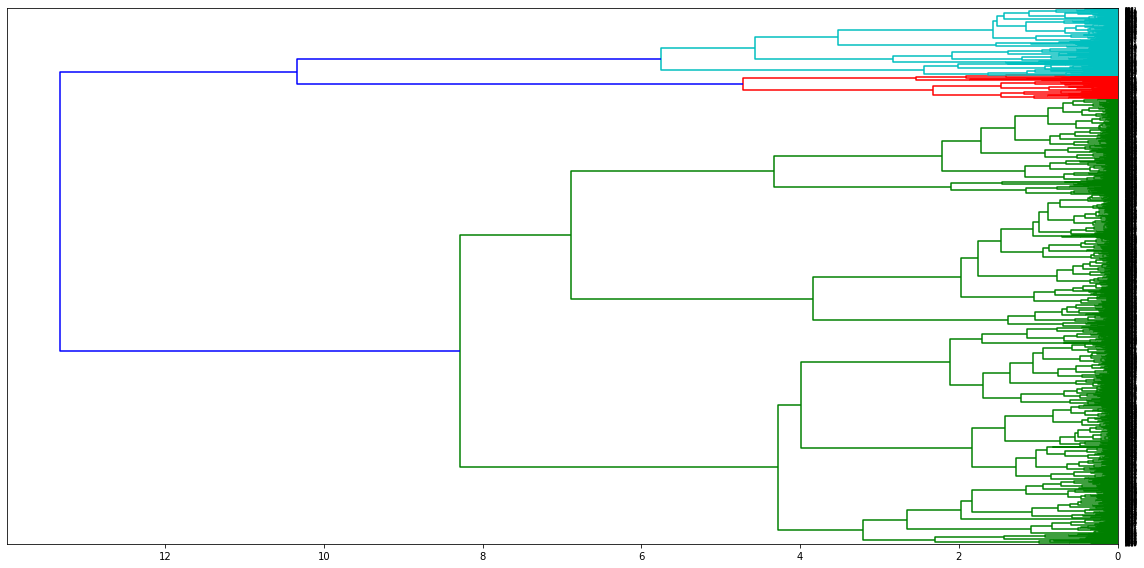

In [214]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

### Visualizing Hierarchical Clustering Dendrogram

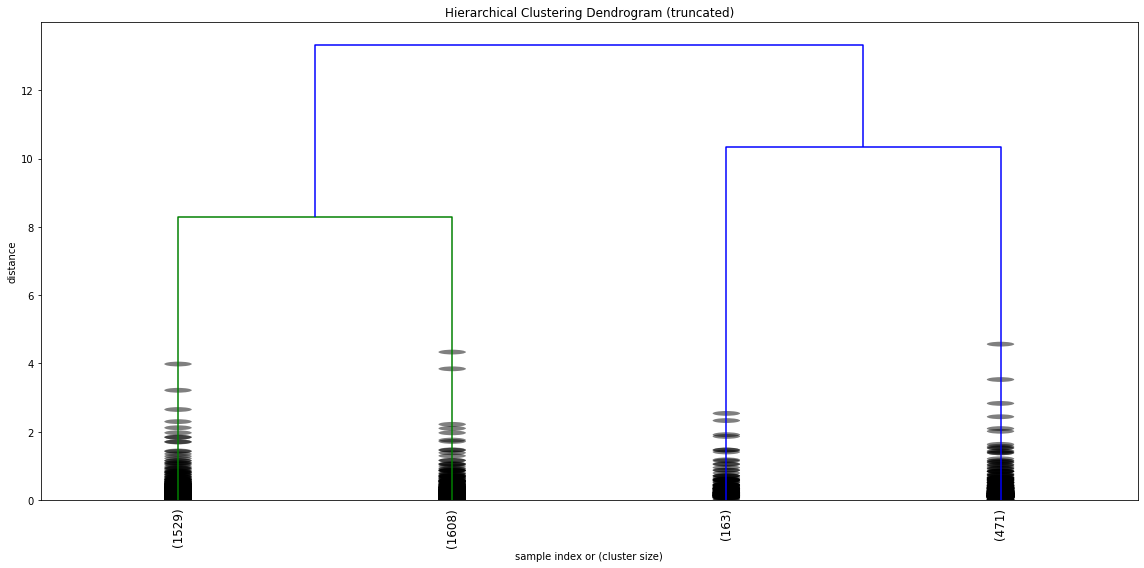

In [215]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

This displays the spread of the different clusters and you can see that the totals in each vary a little bit from the kmeans method but for the most part is pretty similar in sizing.  

### Profiles:
- 1: Longer duration, Movies with actors who have very high number of facebook likes, the highest average number of voted users, high number of user reviews, decently high budget, maybe not as profitable
- 2: Low number of critic reviews, not many facebook likes, lowest number of voting users, low budget, lowest imdb scores (overall not the best)
- 3: Longer duration, Highest number of critic reviews, decent amount of facebook likes, high number voting users, VERY high budget
- 4: Shortest duration, moderate facebook likes, less users for reviews, lower scoring, absolutely not profitable.

### Storytelling: 

**Regressions:** 
From doing various regressions and testing out different models, it was very clear to see that the random forest regressor was by far the best model for this set of data. In addition, the different feature selection techniques allowed for the top 5 most important features to be depicted: 
Top 5 Features: 
1. Number of Users Voted
2. Duration of movie
3. Budget
4. Number of Users for Reviews
5. Gross

So basically a big factor involves the people who are forming opinions over the movies because their votes and reviews are a big factor towards the movie scores. 

**Classification:** 
By creating IMDB Score ‘bins’ categorizing the scores into 4 different buckets, various classification models were able to be tested out on our dataset in order to predict whether a movie would be good or bad. For this analysis, only the numerical columns in this dataset were able to be considered. 

A confusion matrix allowed for interpretation of model accuracy at 67%. Overall, the model was able to most accurately predict the “Good” movies at 75% accuracy. 

Additionally, the important features were able to be identified, this time just using a different method- Recursive Feature Selection (RFE). 
Important Features Using RFE: 
1. Num Critics
2. Duration
3. Number of Faces in Poster (found that one surprising)
4. Num User Reviews

Testing out a bunch of different classification models, they all fell into about the same range of accuracy so it’s personal preference which one to use. 

**Clustering:** 
Decided on 4 as the optimal number of clusters for the movies. Profiling each of these 4 allowed for the user to decipher between the good and bad movies in the future. 

**Additional Variables in Future:**
I would be interested to see what kind of advertising and promotional efforts go into these movies and their sucess because I feel like that is a huge factor that may influence the overall success of the movie, which would in turn affect the IMDb rating. 
